In [ ]:
###   Importação de bibliotecas   ###

In [12]:
import TCC_supercon_dados as tsd
import TCC_supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [7]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [5]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [15]:
###   Parâmetros a serem avalizados   ###

parametros = [{'alpha' : [0.00001,0.0001], 'l1_ratio': np.arange(0,0.2,0.2/3)}]

In [16]:
###   Processo de validação cruzada (busca de parâmetros)   ###

resultados_analise_parametros = tsf.obter_parametros(linear_model.ElasticNet(), parametros, X_treino,Y_treino)

C:\Users\muril\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2718407.1164157973, tolerance: 2016.4112560997555
  positive)


In [17]:
###    Imprime a classe do modelo com os melhores parâmetros calculados   ###

resultados_analise_parametros.best_estimator_

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
###   Treina o modelo com os melhores prâmetros   ###

reg = resultados_analise_parametros.best_estimator_
reg.fit(X_treino,Y_treino)

C:\Users\muril\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2718407.1164157973, tolerance: 2016.4112560997555
  positive)


ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', reg.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(reg.predict(X_treino),Y_treino)))


 R^2: 
 0.731214825073091 
 RMSE : 
 17.735235958599556


In [10]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', reg.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(reg.predict(X_teste),Y_teste)))


 R^2: 
 0.7473686161759635 
 RMSE : 
 17.150352046755096


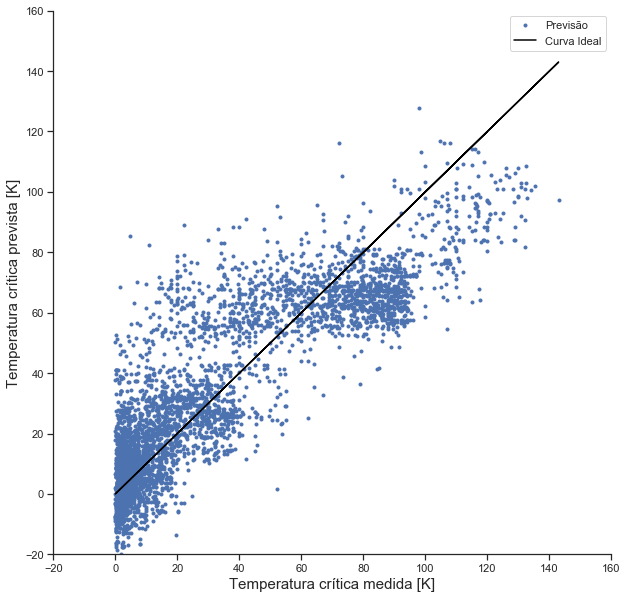

In [15]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

import matplotlib.pyplot as plt

print_x = Y_teste
print_y = reg.predict(X_teste)

f, ax = plt.subplots(figsize=(10, 10))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(-20, 160, 10, endpoint=True))
plt.yticks(np.linspace(-20, 160, 10, endpoint=True))
plt.axis([-20,160,-20,160])

plt.show()